# Customer Churn Prediction



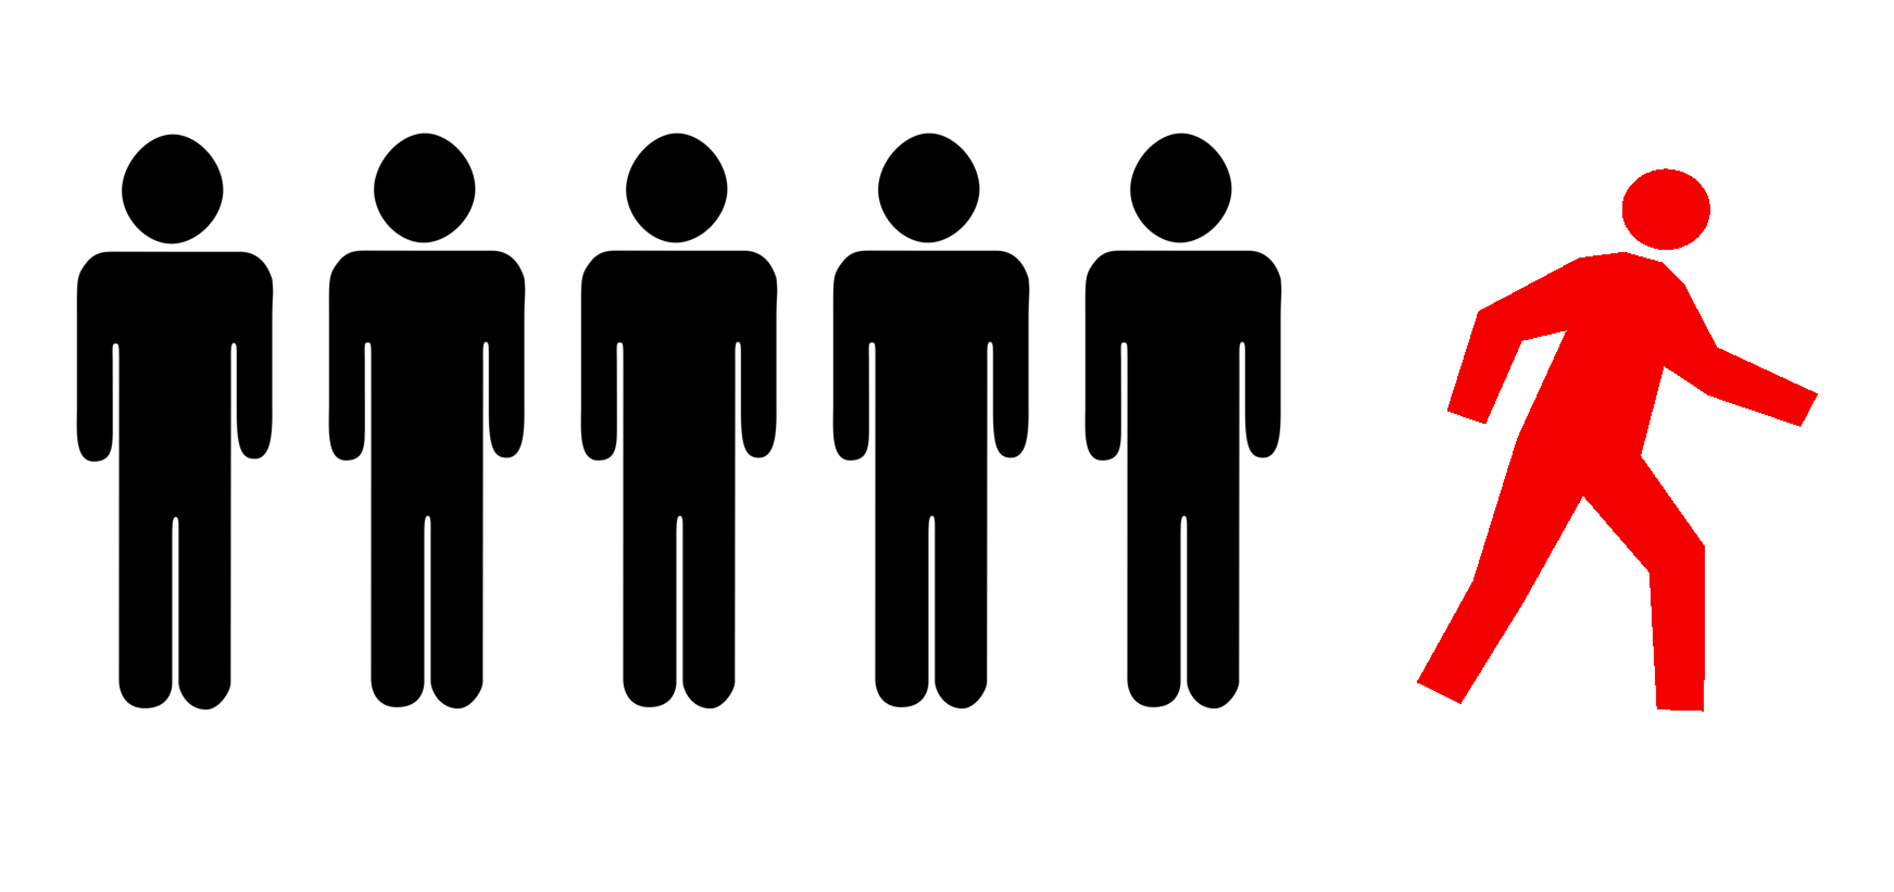

In [169]:
image = Image.open(r'C:\Users\ACER SPIN3\Downloads\churn.png')
display(image)

### Introduction

Customer retention is a critical aspect of every business, particularly in the retail industry, where competition is fierce and customer loyalty is highly valued. It is often more expensive to acquire new customers than it is to retain existing ones. Furthermore, retained customers are often more profitable, as they are more likely to make repeat purchases and recommend the business to others.With this in mind, this project aims to develop a machine learning model to predict customer churn, enabling the company to identify customers who are at risk of leaving so that proactive retention strategies can be implemented.

### About Data :

*	CustomerID: This is a unique identifier assigned to each customer.
*	Churn: This binary variable indicates whether a customer has churned or not (1 indicates churn, 0 indicates no churn).
*	Tenure: This represents the number of years a customer has been with the organization.
*	PreferredLoginDevice: This indicates the device that a customer prefers to use when logging into the organization's app or website.
*	CityTier: This indicates the type of area where the customer lives. Higher values typically represent more urban areas.
*	WarehouseToHome: This denotes the distance from the warehouse to the customer's home.
*	PreferredPaymentMode: This tells us the preferred mode of payment by the customer.
*	Gender: This field indicates the gender of the customer.
*	HourSpendOnApp: This represents the average number of hours a customer spends on the organization's app.
*	NumberOfDeviceRegistered: This indicates the number of devices a customer has registered with the organization.
*	PreferedOrderCat: This reveals the preferred category of items that a customer likes to order.
*	SatisfactionScore: This is a score representing a customer's satisfaction with the organization's services.
*	Marital Status: This indicates the marital status of the customer.
*	NumberOfAddress: This indicates the number of addresses registered by a customer with the organization.
*	Complain: This binary variable indicates whether a customer has filed a complaint or not (1 indicates a complaint, 0 indicates no complaint).
*	OrderAmountHikeFromlastYear: This represents the percentage increase in the order amount from the last year for a customer.
*	CouponUsed: This indicates the number of coupons used by a customer.
*	OrderCount: This represents the number of orders placed by a customer.
*	DaySinceLastOrder: This indicates the number of days since a customer last placed an order.
*	CashbackAmount: This is the amount of cashback received by a customer.


In [239]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip install xgboost

from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#evaluation Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

#Picture size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,4)

#ignore warning
import warnings
warnings.filterwarnings("ignore")

#picture
!pip install pillow
from PIL import Image
from IPython.display import display

In [85]:
dt = pd.read_excel(r"C:\Users\ACER SPIN3\Downloads\PROJECTS\SQL\ECOMMERCE\ecommerce\E Commerce Dataset.xlsx",sheet_name = 1)
dt.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [86]:
dt.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [74]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [87]:
#summary statistics
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [88]:
#check duplicates
dt.duplicated().sum()

0

In [89]:
dt.isnull().sum()
print(dt.isnull().sum())

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


<AxesSubplot:>

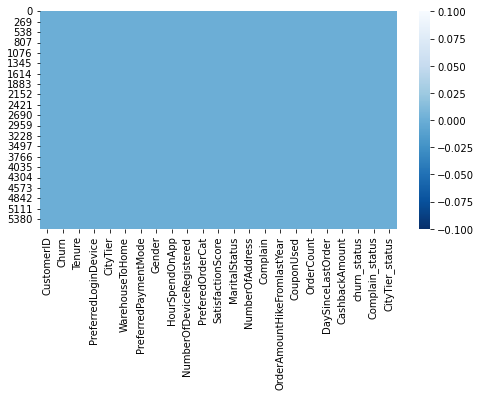

In [167]:
##visualize missing data

sns.heatmap(dt.isnull(),cbar=True, cmap="Blues_r")

In [91]:
##fill null with the mean
dt = dt.fillna(dt.mean())

In [92]:
##check again

dt.isnull().sum()
print(dt.isnull().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


<AxesSubplot:>

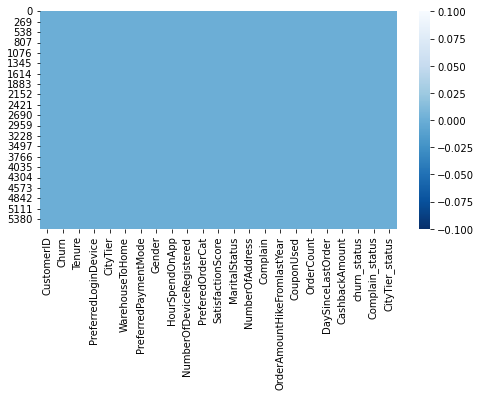

In [168]:
##visualize missing data

sns.heatmap(dt.isnull(),cbar=True, cmap="Blues_r")

In [114]:
dt.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'churn_status'],
      dtype='object')

In [113]:
#categorize churn status

def churn_s(Churn):
    if Churn == 1:
        return "Churn"
    else:
        return "Stayed"
    
dt['churn_status'] = dt['Churn'].apply(churn_s)

In [116]:
#categorize  complain status

def Complain_s(Complain):
    if Complain == 1:
        return "Complain"
    else:
        return "No Complain"
    
dt['Complain_status'] = dt['Complain'].apply(Complain_s)

In [117]:
#categorize city classification

def CityTier_s(CityTier):
    if CityTier == 3:
        return "Rural Areas"
    elif CityTier == 2:
        return "Urban Areas"    
    else:
        return "Metropolitan Areas"
    
dt['CityTier_status'] = dt['CityTier'].apply(CityTier_s)

In [301]:
#categorize customer distance

def WarehouseToHome_s(WarehouseToHome):
    if WarehouseToHome < 10:
        return "Short Distance"
    elif 10 <= WarehouseToHome <= 30: 
        return "Medium Distance"    
    else:
        return "Long Distance"
    
dt['WarehouseToHome_status'] = dt['WarehouseToHome'].apply(WarehouseToHome_s) 


### --------correcting values within dataset ---------

In [122]:
##check for unique values within the columns

for col in dt.columns:
    if dt[col].dtype == 'object':  # check if column's data type is 'object'
        print(f"{col} unique values: {dt[col].unique()}")




PreferredLoginDevice unique values: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode unique values: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Gender unique values: ['Female' 'Male']
PreferedOrderCat unique values: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus unique values: ['Single' 'Divorced' 'Married']
churn_status unique values: ['Churn' 'Stayed']
Complain_status unique values: ['Complain' 'No Complain']
CityTier_status unique values: ['Rural Areas' 'Metropolitan Areas' 'Urban Areas']


In [137]:
##renaming errors 

replace_values = {'Phone' : 'Mobile Phone'}
dt['PreferredLoginDevice'] = dt['PreferredLoginDevice'].replace(replace_values)

replace_values1 = {'CC' : 'Credit Card', 'COD' : 'Cash on Delivery'}
dt['PreferredPaymentMode'] = dt['PreferredPaymentMode'].replace(replace_values1)

replace_values2 = {'Mobile' : 'Mobile Phone'}
dt['PreferedOrderCat'] = dt['PreferedOrderCat'].replace(replace_values2)




In [138]:
##recheck for unique values 

for col in dt.columns:
    if dt[col].dtype == 'object':  # check if column's data type is 'object'
        print(f"{col} unique values: {dt[col].unique()}")


PreferredLoginDevice unique values: ['Mobile Phone' 'Computer']
PreferredPaymentMode unique values: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
Gender unique values: ['Female' 'Male']
PreferedOrderCat unique values: ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus unique values: ['Single' 'Divorced' 'Married']
churn_status unique values: ['Churn' 'Stayed']
Complain_status unique values: ['Complain' 'No Complain']
CityTier_status unique values: ['Rural Areas' 'Metropolitan Areas' 'Urban Areas']


##### -----EXPLORATORY DATA ANALYSIS----

#### Univariate

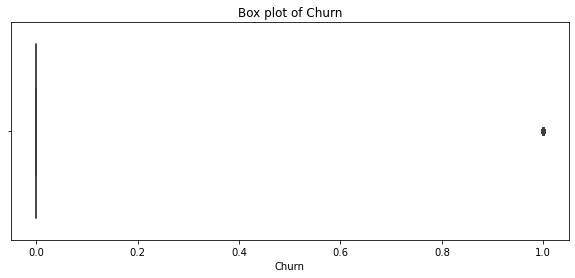

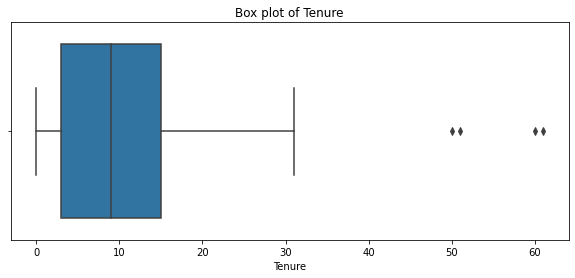

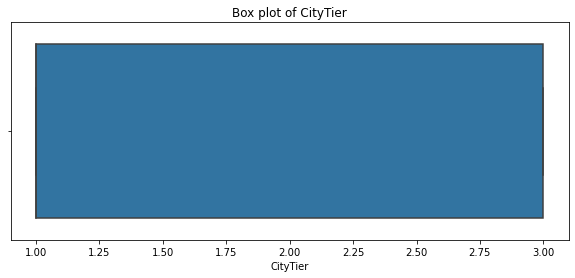

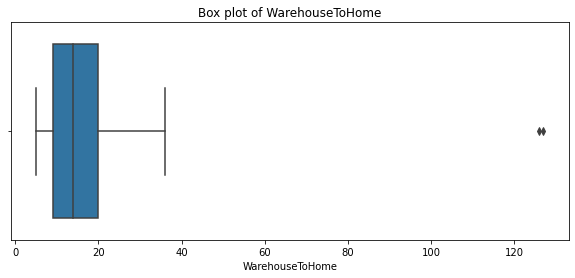

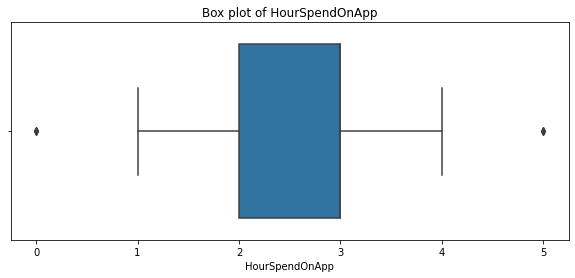

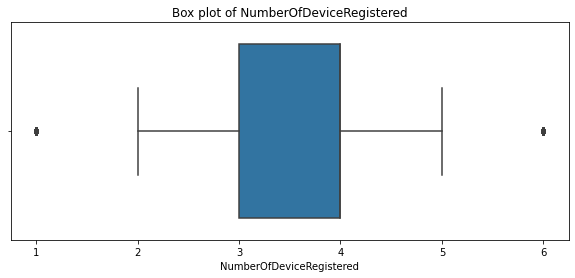

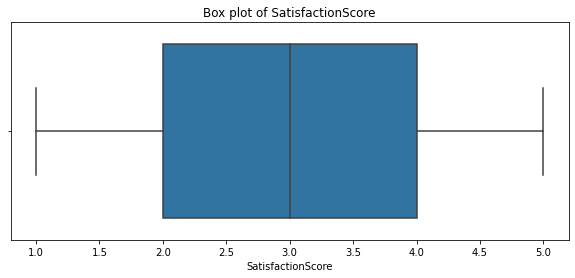

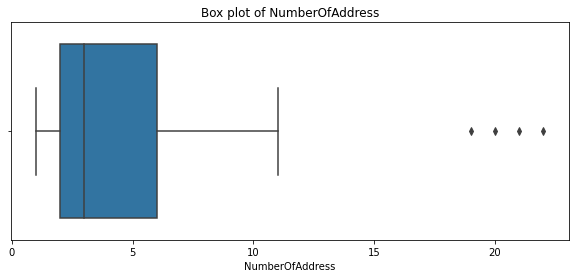

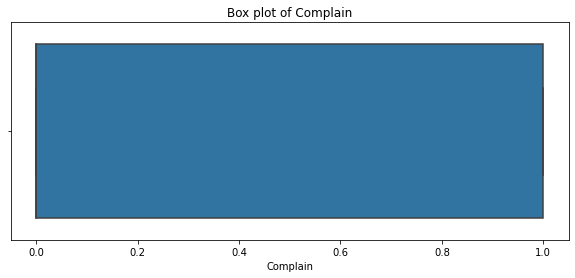

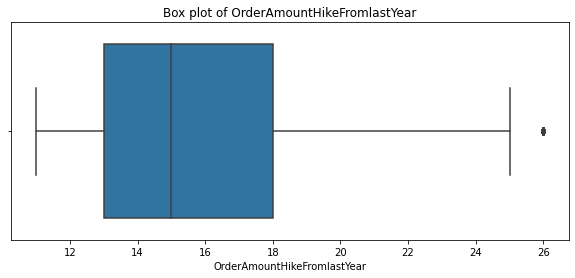

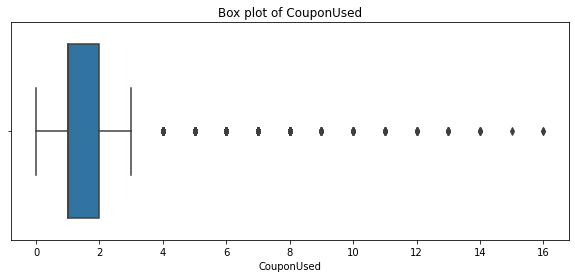

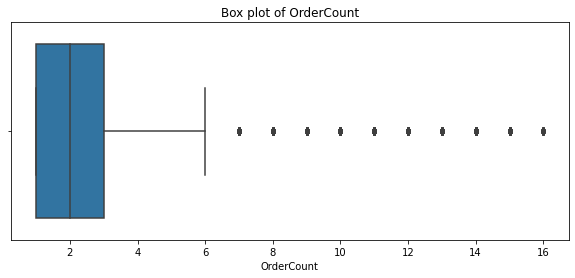

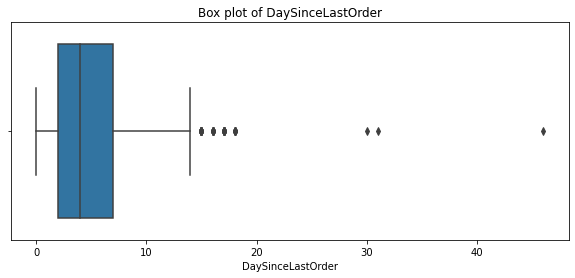

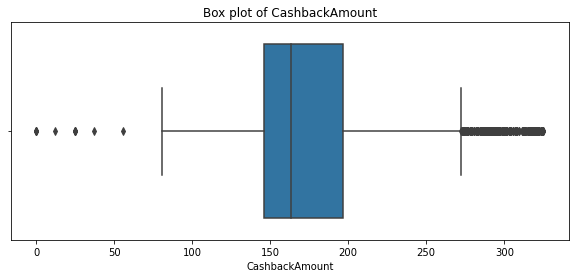

In [204]:
##check for outliers in numeric datatypes 
numeric_cols = dt.select_dtypes(include=np.number).columns[1:].tolist()

##df.select_dtypes(include=np.number) selects only the columns of df that have a numeric data type, 
##and .columns.tolist() converts the index object to a list of column names. 
##The boxplots are then generated for these numeric columns only

for cols in numeric_cols:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=dt[cols])
    plt.title(f'Box plot of {cols}')

* there are alot of outliers and it is important we reduce the outiers by standardization or normalization

In [263]:
# Calculate the total customers, churned customers,churn rate
churned_customers = dt[dt['Churn'] == 1]['CustomerID'].nunique()
total_customers = dt['CustomerID'].nunique()

churn_rate = churned_users / total_customers

print(f'The total customers is {total_customers}')
print(f'The total churned  is {churned_customers}')
print(f'The churn rate is {churn_rate:.2%}')



The total customers is 5630
The total churned  is 948
The churn rate is 16.84%


* ###  Bivariate Analysis

In [157]:
dt.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'churn_status',
       'Complain_status', 'CityTier_status'],
      dtype='object')

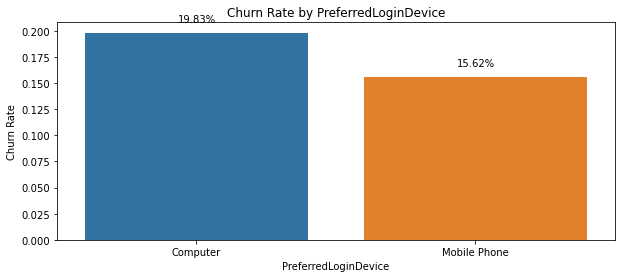

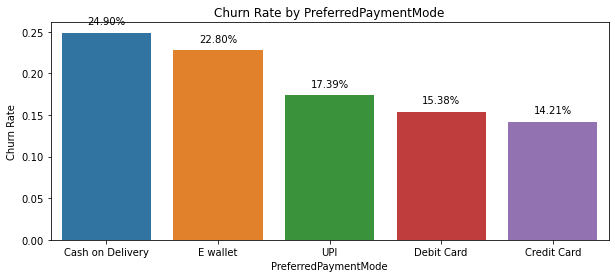

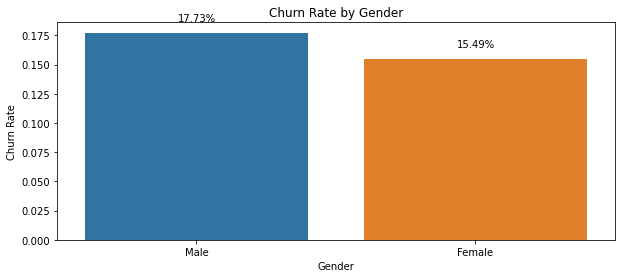

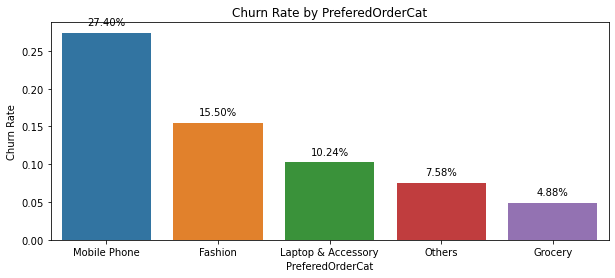

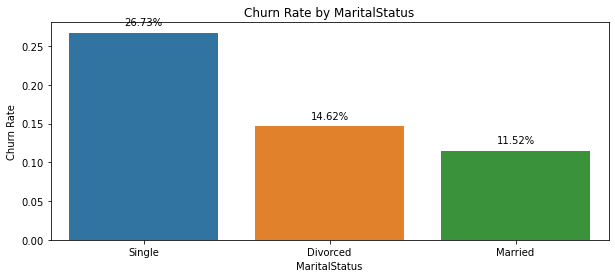

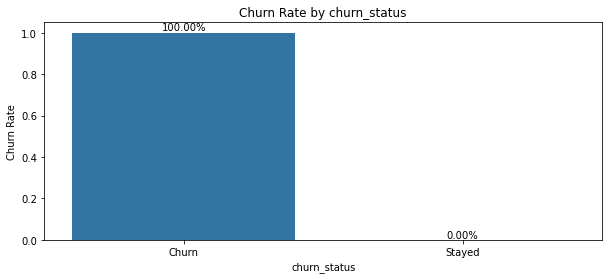

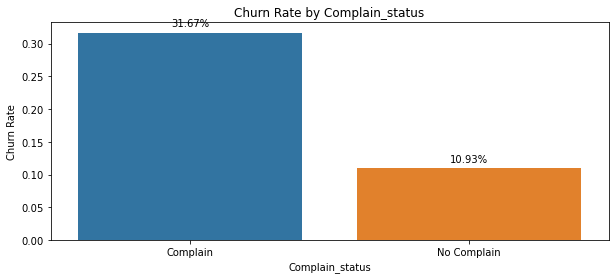

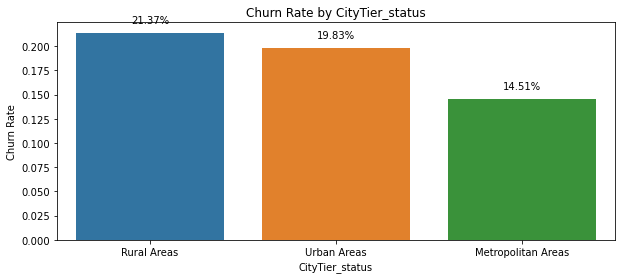

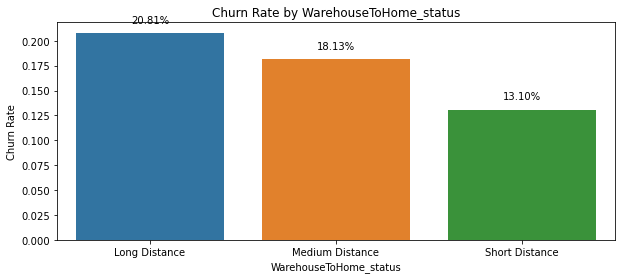

In [302]:
##plots forchurn rate by differnt categories using the loop through

categorical_cols = dt.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    # Calculate churn rate
    churn_rate = dt.groupby(col)['Churn'].mean().sort_values(ascending=False)

    ax = sns.barplot(x=churn_rate.index, y=churn_rate.values, order=churn_rate.index)

    # Annotate the bars with the churn rate
    for i, v in enumerate(churn_rate.values):
        ax.text(i, v + 0.01, '{:.2%}'.format(v), ha='center') # Notice the format is now '.2%'

   
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xlabel(col)

    
    plt.show()


1. Churn rates are highest amongst customers who lodge complaints, indicating a need to improve customer service and address complaints promptly and efficiently.
2. Customers with multiple devices tend to churn at a higher rate. This may suggest the need for better app optimization across different devices.
3. There is a higher churn in categories like mobile phones and fashion, indicating the necessity to understand customers' needs and preferences better in these categories.
4. There is a higher churn rate in rural areas compared to urban and metropolitan areas, suggesting a possible disparity in service quality or customer experience that needs to be addressed.
5. Payment mode preference significantly influences the churn rate. Customers using more traditional payment methods like cash on delivery churn more than those using digital payment methods.
6. The distance of orders plays a significant role in customer churn rates. The churn rate is highest among customers placing long-distance orders, suggesting potential shortcomings in our long-distance logistics, delivery, or service quality.

### Multivariate analysis

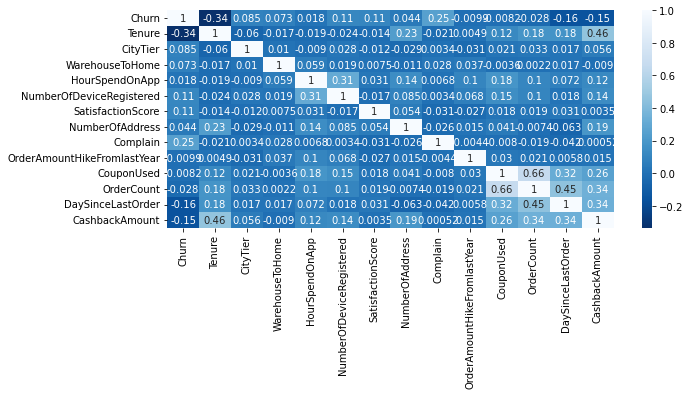

In [254]:
numeric_cols = dt.select_dtypes(include=np.number).columns[1:].tolist()
sns.heatmap(dt[numeric_cols].corr(), annot=True, cmap='Blues_r')
plt.show()



### Feature Engineering / Preprocessing

In [261]:
dt.head(2)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,churn_status,Complain_status,CityTier_status
0,50001,1,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,9,1,11.0,1.0,1.0,5.0,159.93,Churn,Complain,Rural Areas
1,50002,1,10.189899,Mobile Phone,1,8.0,UPI,Male,3.0,4,...,7,1,15.0,0.0,1.0,0.0,120.90,Churn,Complain,Metropolitan Areas


In [276]:
dt.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'churn_status',
       'Complain_status', 'CityTier_status'],
      dtype='object')

In [277]:
dt1 = dt[['CustomerID',  'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']]

label = dt[['Churn']]

In [278]:
dt1.head(2)

,CustomerID,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,4.000000,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,10.189899,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90


In [279]:
label.head(2)

,Churn
0,1
1,1


#### Normalization

In [280]:

##dealing witth outliers using normalization technique (minmaxscaler)
    
##normalize the data 

scaler = MinMaxScaler()
dt1["Scaled_Tenure"] = scaler.fit_transform(dt1['Tenure'].values.reshape(-1,1))
dt1["Scaled_WarehouseToHome"] = scaler.fit_transform(dt1['WarehouseToHome'].values.reshape(-1,1))
dt1["Scaled_HourSpendOnApp"] = scaler.fit_transform(dt1['HourSpendOnApp'].values.reshape(-1,1))
dt1["Scaled_NumberOfDeviceRegistered"] = scaler.fit_transform(dt1['NumberOfDeviceRegistered'].values.reshape(-1,1))
dt1["Scaled_NumberOfAddress"] = scaler.fit_transform(dt1['NumberOfAddress'].values.reshape(-1,1))
dt1["Scaled_OrderAmountHikeFromlastYear"] = scaler.fit_transform(dt1['OrderAmountHikeFromlastYear'].values.reshape(-1,1))
dt1["Scaled_CouponUsed"] = scaler.fit_transform(dt1['CouponUsed'].values.reshape(-1,1))
dt1["Scaled_OrderCount"] = scaler.fit_transform(dt1['OrderCount'].values.reshape(-1,1))
dt1["Scaled_DaySinceLastOrder"] = scaler.fit_transform(dt1['DaySinceLastOrder'].values.reshape(-1,1))
dt1["Scaled_CashbackAmount"] = scaler.fit_transform(dt1['CashbackAmount'].values.reshape(-1,1))


In [283]:
dt1.drop(['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount'],axis=1,inplace=True)

In [284]:
dt1.head()

,CustomerID,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,Scaled_Tenure,Scaled_WarehouseToHome,Scaled_HourSpendOnApp,Scaled_NumberOfDeviceRegistered,Scaled_NumberOfAddress,Scaled_OrderAmountHikeFromlastYear,Scaled_CouponUsed,Scaled_OrderCount,Scaled_DaySinceLastOrder,Scaled_CashbackAmount
0,50001,Mobile Phone,3,Debit Card,Female,Laptop & Accessory,2,Single,1,0.065574,0.008197,0.600000,0.4,0.380952,0.000000,0.0625,0.0,0.108696,0.492107
1,50002,Mobile Phone,1,UPI,Male,Mobile Phone,3,Single,1,0.167048,0.024590,0.600000,0.6,0.285714,0.266667,0.0000,0.0,0.000000,0.372011
2,50003,Mobile Phone,1,Debit Card,Male,Mobile Phone,3,Single,1,0.167048,0.204918,0.400000,0.6,0.238095,0.200000,0.0000,0.0,0.065217,0.370104
3,50004,Mobile Phone,3,Debit Card,Male,Laptop & Accessory,5,Single,0,0.000000,0.081967,0.400000,0.6,0.333333,0.800000,0.0000,0.0,0.065217,0.412536
4,50005,Mobile Phone,1,Credit Card,Male,Mobile Phone,5,Single,0,0.000000,0.057377,0.586307,0.4,0.095238,0.000000,0.0625,0.0,0.065217,0.398782


#### Label Encoder

In [290]:
from sklearn.preprocessing import LabelEncoder

#label encoding
encoder = LabelEncoder() ## method initialization

for c in dt1.columns[1:]:
    if dt1[c].dtype=='object':
        dt1[c] = encoder.fit_transform(dt1[c])
    else:
        dt1[c]= dt1[c]
    
dt1.head()

,CustomerID,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,Scaled_Tenure,Scaled_WarehouseToHome,Scaled_HourSpendOnApp,Scaled_NumberOfDeviceRegistered,Scaled_NumberOfAddress,Scaled_OrderAmountHikeFromlastYear,Scaled_CouponUsed,Scaled_OrderCount,Scaled_DaySinceLastOrder,Scaled_CashbackAmount
0,50001,1,3,2,0,2,2,2,1,0.065574,0.008197,0.600000,0.4,0.380952,0.000000,0.0625,0.0,0.108696,0.492107
1,50002,1,1,4,1,3,3,2,1,0.167048,0.024590,0.600000,0.6,0.285714,0.266667,0.0000,0.0,0.000000,0.372011
2,50003,1,1,2,1,3,3,2,1,0.167048,0.204918,0.400000,0.6,0.238095,0.200000,0.0000,0.0,0.065217,0.370104
3,50004,1,3,2,1,2,5,2,0,0.000000,0.081967,0.400000,0.6,0.333333,0.800000,0.0000,0.0,0.065217,0.412536
4,50005,1,1,1,1,3,5,2,0,0.000000,0.057377,0.586307,0.4,0.095238,0.000000,0.0625,0.0,0.065217,0.398782


In [291]:
dt1.drop(['CustomerID'],axis=1,inplace=True)

### Supervised Machine Learning 

In [293]:
#split into train and test

X_train,  X_test, y_train, y_test = train_test_split(dt1, label,test_size = 0.2, random_state=42)

In [294]:
from sklearn.metrics import confusion_matrix, f1_score
## Machine learning models in classsifier

classifiers = [[XGBClassifier(),'XGB Classifier'],
               [RandomForestClassifier(),'Random Forest'],
               [KNeighborsClassifier(),'K-Nearest neighbours'],
               [SGDClassifier(),'SGD Classifier'],
               [SVC(),'SVC'],
               [GaussianNB(),'Naive Bayes'],
               [DecisionTreeClassifier(random_state = 42), 'Decision tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]


Model: XGB Classifier
Accuracy: 98%
Precision: 96%
Recall: 89%
F1 score: 93%
ROC score: 94%
Confusion matrix:
 [[935   6]
 [ 20 165]]



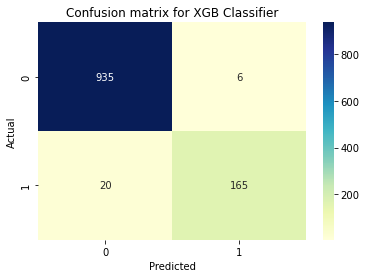



Model: Random Forest
Accuracy: 98%
Precision: 99%
Recall: 90%
F1 score: 94%
ROC score: 95%
Confusion matrix:
 [[940   1]
 [ 19 166]]



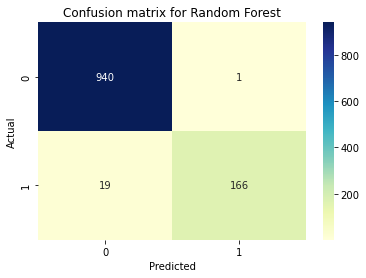



Model: K-Nearest neighbours
Accuracy: 93%
Precision: 86%
Recall: 69%
F1 score: 77%
ROC score: 83%
Confusion matrix:
 [[921  20]
 [ 58 127]]



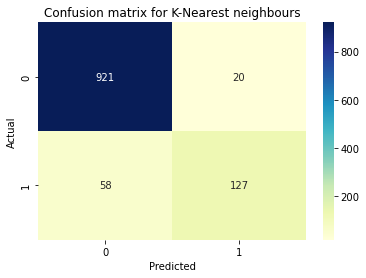



Model: SGD Classifier
Accuracy: 89%
Precision: 69%
Recall: 58%
F1 score: 63%
ROC score: 76%
Confusion matrix:
 [[892  49]
 [ 78 107]]



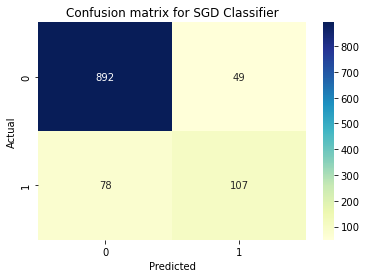



Model: SVC
Accuracy: 86%
Precision: 89%
Recall: 18%
F1 score: 30%
ROC score: 59%
Confusion matrix:
 [[937   4]
 [151  34]]



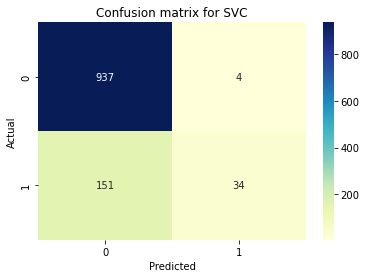



Model: Naive Bayes
Accuracy: 87%
Precision: 61%
Recall: 63%
F1 score: 62%
ROC score: 77%
Confusion matrix:
 [[868  73]
 [ 69 116]]



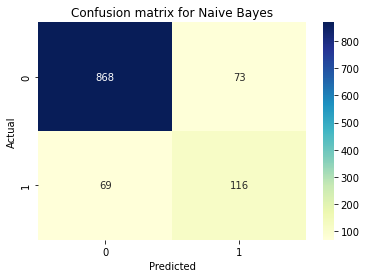



Model: Decision tree
Accuracy: 97%
Precision: 90%
Recall: 89%
F1 score: 90%
ROC score: 94%
Confusion matrix:
 [[923  18]
 [ 20 165]]



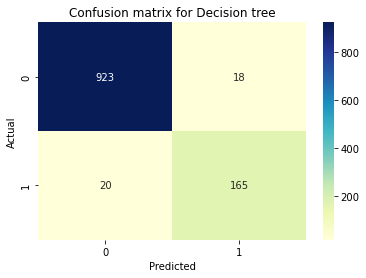



Model: Logistic Regression
Accuracy: 89%
Precision: 79%
Recall: 42%
F1 score: 55%
ROC score: 70%
Confusion matrix:
 [[921  20]
 [108  77]]



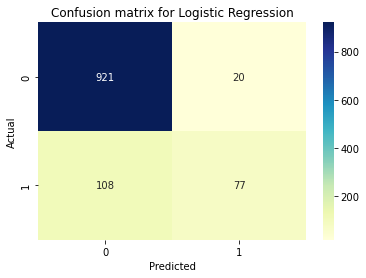

In [298]:
### loop through the algorithm to print the prediction score and confusion matrix
accuracy = {}
precision = {}
recall = {}
f1 = {}
roc = {}
conf_matrix = {}

for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    f_score = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    c_matrix = confusion_matrix(y_test, pred)
    
    accuracy[model_name] = str(round(a_score*100)) + '%'
    precision[model_name] = str(round(p_score*100)) + '%'
    recall[model_name] = str(round(r_score*100)) + '%'
    f1[model_name] = str(round(f_score*100)) + '%'
    roc[model_name] = str(round(roc_score*100)) + '%'
    conf_matrix[model_name] = c_matrix
    
    print(f'Model: {model_name}\nAccuracy: {accuracy[model_name]}\nPrecision: {precision[model_name]}\nRecall: {recall[model_name]}\nF1 score: {f1[model_name]}\nROC score: {roc[model_name]}\nConfusion matrix:\n {conf_matrix[model_name]}\n')

  # this will show the confusion matrix as a heatmap

    plt.figure(figsize=(6, 4))
    sns.heatmap(c_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Confusion matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print('\n')

# Summary Report on Customer Churn Prediction

### Objective:
- The objective of this project was to predict customer churn for our retail company. Identifying customers who are at risk of churning allows us to take proactive measures to retain these customers, ultimately leading to increased customer loyalty and reduced revenue loss.

### Model Selection:
- We tested multiple classification models, including XGB Classifier, K-Nearest Neighbors, SGD Classifier, SVC, Naive Bayes, Decision Tree, Logistic Regression, and Random Forest.

- After comparing the performance of these models based on accuracy, precision, recall, F1 score, ROC score, and the confusion matrix, we selected the Random Forest model.

### Model Performance:

After carefully experimenting with various machine learning models for predicting customer churn, the Random Forest model has been chosen as the most suitable model for this task. This decision was driven primarily by the model's strong performance across multiple metrics, particularly its ability to identify true churn cases accurately.

Our chosen Random Forest model achieved the following scores:

* Accuracy: 98%
* Precision: 99%
* Recall: 90%
* F1 score: 94%
* ROC score: 95%

While all the metrics were robust, we were particularly focused on the recall score because the highest priority is accurately identifying all customers who will churn (i.e., minimizing false negatives; A false negative means that you predicted a customer would not churn, but they actually did. This means a lost customer, which might also mean lost revenue, especially if the customer was a high-value customer.). 

The Confusion matrix was:

* [[940 1]
* [ 19 166]]


### Implementation and Recommendations:

The goal of this churn prediction model is to help the company retain customers and thereby increase revenue. By identifying which customers are likely to churn, the company can proactively address their needs and potentially prevent them from leaving.

Given the high performance of the Random Forest model, we recommend its deployment for predicting customer churn. Customers identified as high-risk by the model can be targeted with tailored retention strategies, such as personalized marketing, customer-specific offers, or improved service level.

Keep in mind, though, that customer retention is an iterative process. The results of these interventions will be monitored regularly, and the model updated with new data to ensure its predictive performance remains robust over time.

By leveraging machine learning for customer retention, we anticipate seeing an increase in customer loyalty, improved customer lifetime value, and enhanced profitability for our retail company.